 ## Calling Python from Julia

**Spencer Lyon**

*Date: 4-23-15*

In [1]:
using PyCall
using PyPlot  # also Pandas.jl, SymPy.jl...

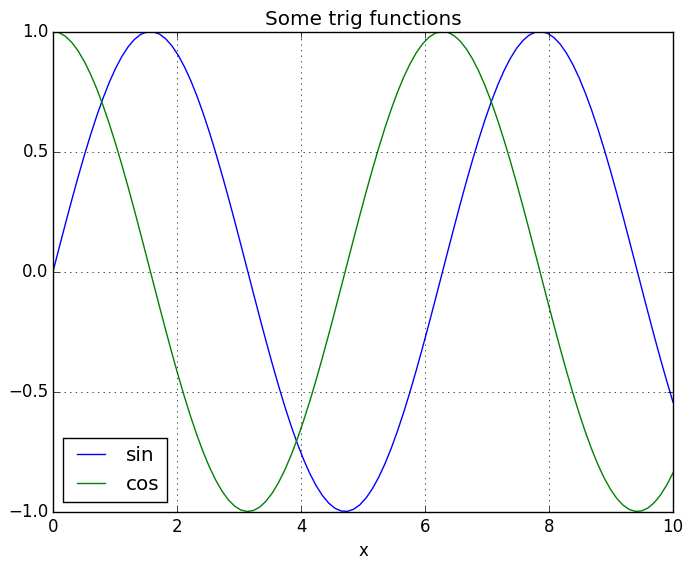

In [2]:
# basic plotting
fig, ax = plt.subplots()

# data
x = linspace(0, 10, 100)
y1 = sin(x)
y2 = cos(x)

# plot + style
ax[:plot](x, y1)  # access ax.XX via ax[:XX]
ax[:plot](x, y2) 
ax[:set_xlabel]("x")
ax[:set_title]("Some trig functions")
ax[:legend](["sin", "cos"], loc=0)
ax[:grid]()

In [3]:
# calling scipy.optimize
@pyimport scipy.optimize as opt

# Runge's function
f(x) = 1 ./ (1 + 25x.^2)

f (generic function with 1 method)

In [5]:
opt.minimize(f, 1.0)

Dict{Any,Any} with 9 entries:
  "hess_inv" => 1x1 Array{Float64,2}:…
  "fun"      => 9.060924155469309e-5
  "nfev"     => 51
  "status"   => 0
  "message"  => "Optimization terminated successfully."
  "success"  => true
  "x"        => [21.009904176482816]
  "jac"      => [-8.624601832707413e-6]
  "njev"     => 17

In [6]:
# Example from scipy.special docs
@pyimport scipy.special as special

Bessel functions are a family of solutions to Bessel’s differential equation with real or complex order alpha:

$$x^2 \frac{\partial^2 y}{\partial x^2} + x \frac{\partial y}{\partial x} + (x^2 - \alpha^2) y = 0$$

Among other uses, these functions arise in wave propagation problems such as the vibrational modes of a thin drum head. Here is an example of a circular drum head anchored at the edge:

In [7]:
function drumhead_height(n, k, distance, angle, t)
    kth_zero = special.jn_zeros(n, k)[end]
    return cos(t) .* cos(n*angle) * special.jn(n, distance*kth_zero)
end

theta = linspace(0, 2π, 50)
radius = linspace(0, 1, 50)
x = hcat([r * cos(theta) for r in radius]...)'
y = hcat([r * sin(theta) for r in radius]...)' 
z = hcat([drumhead_height(1, 1, r, theta, 0.5) for r in radius]...)'   

50x50 Array{Float64,2}:
  0.0         0.0         0.0        …   0.0         0.0         0.0      
  0.0342864   0.0340049   0.0331651      0.0331651   0.0340049   0.0342864
  0.0684157   0.067854    0.0661781      0.0661781   0.067854    0.0684157
  0.102231    0.101392    0.0988879      0.0988879   0.101392    0.102231 
  0.135579    0.134466    0.131145       0.131145    0.134466    0.135579 
  0.168306    0.166924    0.162801   …   0.162801    0.166924    0.168306 
  0.200262    0.198618    0.193713       0.193713    0.198618    0.200262 
  0.231304    0.229405    0.223739       0.223739    0.229405    0.231304 
  0.26129     0.259145    0.252744       0.252744    0.259145    0.26129  
  0.290084    0.287703    0.280597       0.280597    0.287703    0.290084 
  0.317559    0.314952    0.307173   …   0.307173    0.314952    0.317559 
  0.34359     0.340769    0.332353       0.332353    0.340769    0.34359  
  0.368063    0.365041    0.356026       0.356026    0.365041    0.368063 
 

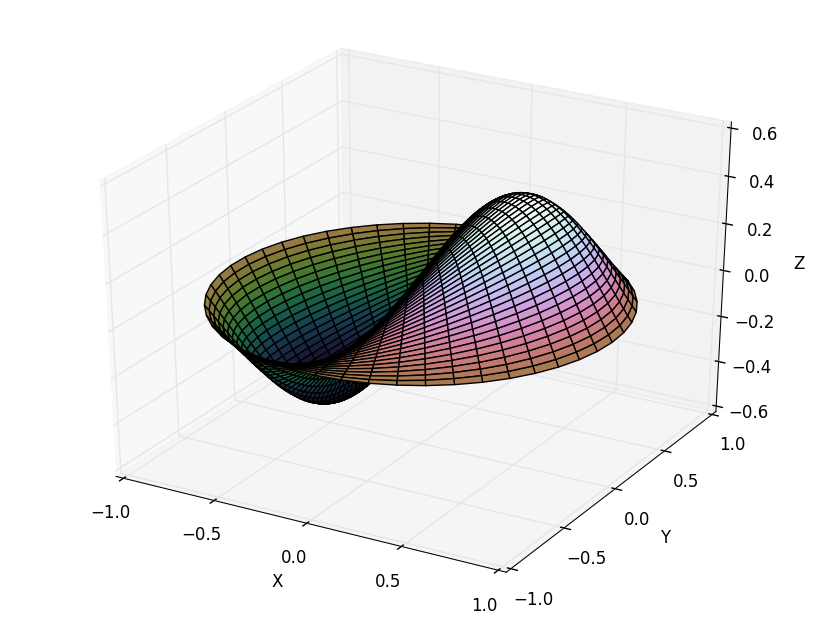

PyObject <matplotlib.text.Text object at 0x3266bc410>

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax[:plot_surface](x, y, z, rstride=1, cstride=1, cmap=ColorMap("cubehelix"))
ax[:set_xlabel]("X")
ax[:set_ylabel]("Y")
ax[:set_zlabel]("Z")

In [9]:
# Calling into networkx
@pyimport networkx as nx

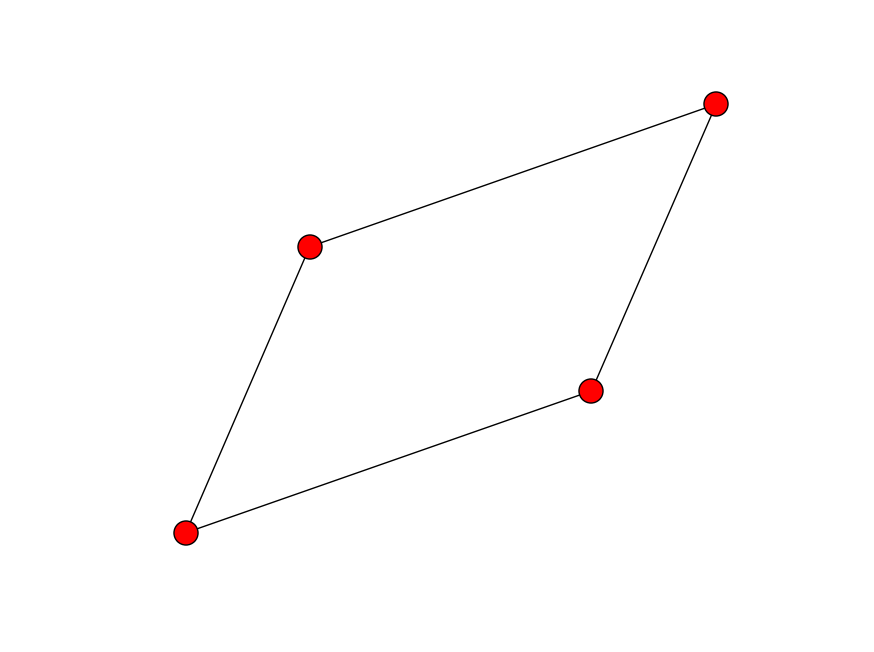

In [10]:
# 2d hypercube
nx.draw(nx.hypercube_graph(2))

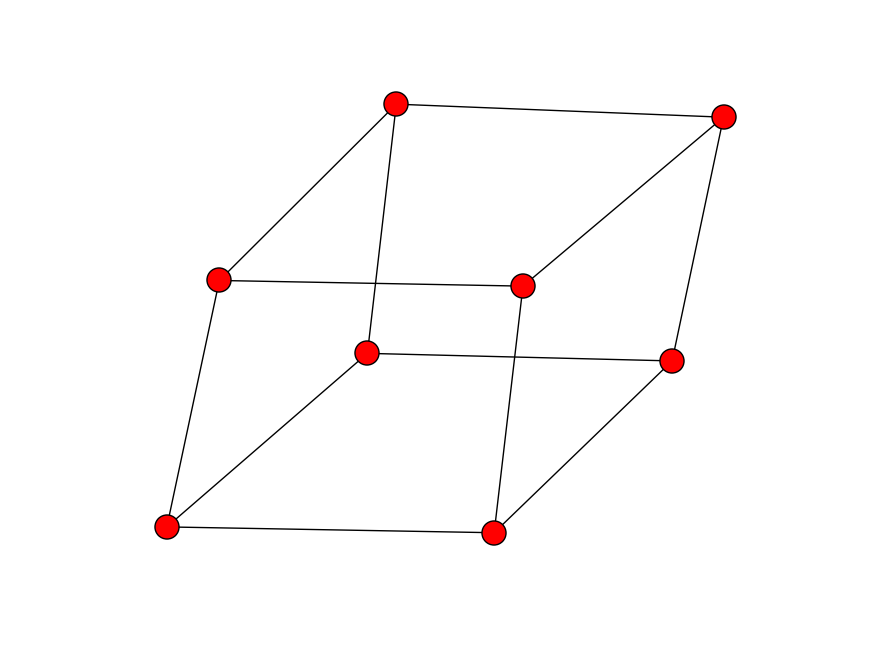

In [11]:
# now 3d
nx.draw(nx.hypercube_graph(3))

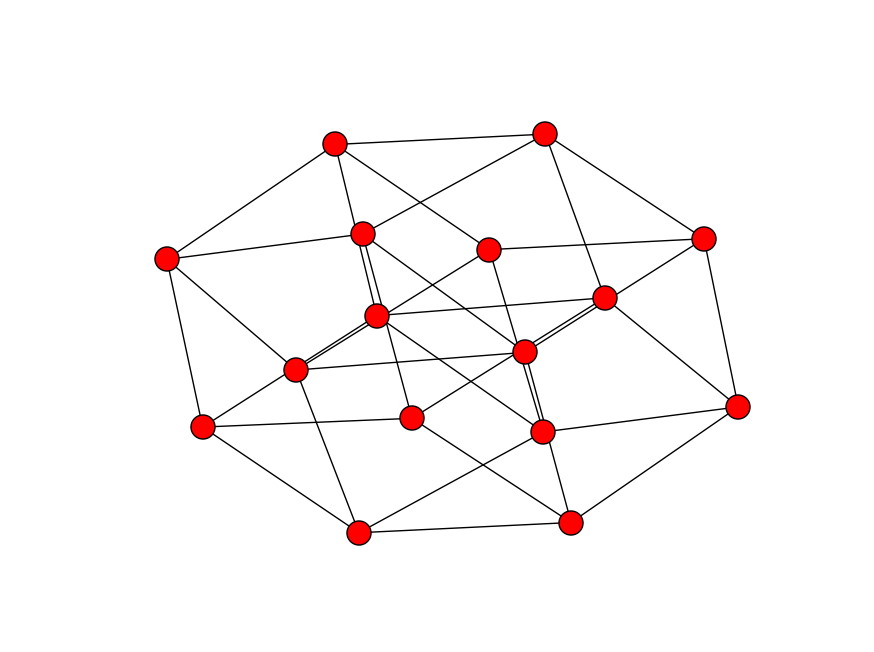

In [12]:
# now 4d ... WARNING: your mind might be blown
nx.draw(nx.hypercube_graph(4))